# Data Preparation

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

Preparing dataset through multiple files

In [38]:
customers = pd.read_csv("olist_customers_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
translations = pd.read_csv("product_category_name_translation.csv")

In [3]:
customers.drop(columns='customer_zip_code_prefix', inplace=True)
customers

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS


In [4]:
order_items.drop(columns=['seller_id', 'shipping_limit_date', 'freight_value'], inplace=True)
order_items.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [5]:
order_payments.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
order_payments.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


In [6]:
orders.drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)
orders.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [7]:
products.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                       'product_weight_g', 'product_length_cm', 'product_height_cm',
                       'product_width_cm'], inplace=True)
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [8]:
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
data1 = orders.merge(customers, left_on="customer_id", right_on="customer_id")
data1

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ


In [10]:
data2 = data1.merge(order_items, left_on='order_id', right_on='order_id',)
data2

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90
...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,205.99
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99


In [11]:
data3 = data2.merge(order_payments, left_on='order_id', right_on='order_id')
data3

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,credit_card,179.12
...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,credit_card,195.00
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,205.99,credit_card,271.01
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,credit_card,441.16
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,credit_card,441.16


In [12]:
data4 = data3.merge(orders, left_on='order_id', right_on='order_id')
data4

,order_id,customer_id_x,order_purchase_timestamp_x,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,customer_id_y,order_purchase_timestamp_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,boleto,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,credit_card,179.12,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,credit_card,195.00,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,205.99,credit_card,271.01,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,credit_card,441.16,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,credit_card,441.16,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


In [13]:
data5 = data4.merge(products, left_on='product_id', right_on='product_id')
data5

,order_id,customer_id_x,order_purchase_timestamp_x,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,customer_id_y,order_purchase_timestamp_y,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,utilidades_domesticas
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,utilidades_domesticas
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,utilidades_domesticas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:07,fb9310710003399b031add3e55f34719,sao paulo,SP,1,0df37da38a30a713453b03053d60d3f7,356.00,credit_card,748.24,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:07,esporte_lazer
117597,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:07,fb9310710003399b031add3e55f34719,sao paulo,SP,2,0df37da38a30a713453b03053d60d3f7,356.00,credit_card,748.24,609b9fb8cad4fe0c7b376f77c8ab76ad,2017-08-10 21:21:07,esporte_lazer
117598,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,2017-12-20 09:52:41,a49e8e11e850592fe685ae3c64b40eca,campo do tenente,PR,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,credit_card,71.04,a2f7428f0cafbc8e59f20e1444b67315,2017-12-20 09:52:41,instrumentos_musicais
117599,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,72.00,credit_card,85.08,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,beleza_saude


In [14]:
data6 = data5.merge(translations, left_on='product_category_name', right_on='product_category_name')
data6

,order_id,customer_id_x,order_purchase_timestamp_x,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,customer_id_y,order_purchase_timestamp_y,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,utilidades_domesticas,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,utilidades_domesticas,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,utilidades_domesticas,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:53,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,1,4a24717893a6c8f3cfcf9843b8987d15,25.00,boleto,33.69,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:53,artes_e_artesanato,arts_and_craftmanship
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,1,9c313adb4b38a55b092f53f83f78be9e,19.00,credit_card,84.63,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,artes_e_artesanato,arts_and_craftmanship
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,2,eacb104882d39ffb53140b1d1860a7c3,39.90,credit_card,84.63,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,artes_e_artesanato,arts_and_craftmanship
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,d8bee9ec375c3a0f9ef8ed7456a51dcd,rolim de moura,RO,1,6c7a0a349ad11817745e3ad58abd5c79,183.29,credit_card,209.06,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,seguros_e_servicos,security_and_services


In [15]:
data6.drop(columns=['product_category_name', 'customer_id_y', 'order_purchase_timestamp_y'], inplace=True)
data6

,order_id,customer_id_x,order_purchase_timestamp_x,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:53,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,1,4a24717893a6c8f3cfcf9843b8987d15,25.00,boleto,33.69,arts_and_craftmanship
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,1,9c313adb4b38a55b092f53f83f78be9e,19.00,credit_card,84.63,arts_and_craftmanship
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,2,eacb104882d39ffb53140b1d1860a7c3,39.90,credit_card,84.63,arts_and_craftmanship
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,d8bee9ec375c3a0f9ef8ed7456a51dcd,rolim de moura,RO,1,6c7a0a349ad11817745e3ad58abd5c79,183.29,credit_card,209.06,security_and_services


In [16]:
data6.rename(columns={'customer_id_x': 'customer_id', 'order_purchase_timestamp_x': 'order_purchase_timestamp',
                      'product_category_name_english': 'product_category'}, inplace=True)
data6.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares


# Data Cleaning

In [17]:
data6.drop_duplicates(inplace=True)
data6

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:53,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,1,4a24717893a6c8f3cfcf9843b8987d15,25.00,boleto,33.69,arts_and_craftmanship
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,1,9c313adb4b38a55b092f53f83f78be9e,19.00,credit_card,84.63,arts_and_craftmanship
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,2,eacb104882d39ffb53140b1d1860a7c3,39.90,credit_card,84.63,arts_and_craftmanship
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,d8bee9ec375c3a0f9ef8ed7456a51dcd,rolim de moura,RO,1,6c7a0a349ad11817745e3ad58abd5c79,183.29,credit_card,209.06,security_and_services


In [18]:
data6.dropna(inplace=True)
data6

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:53,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,1,4a24717893a6c8f3cfcf9843b8987d15,25.00,boleto,33.69,arts_and_craftmanship
115874,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,1,9c313adb4b38a55b092f53f83f78be9e,19.00,credit_card,84.63,arts_and_craftmanship
115875,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,2,eacb104882d39ffb53140b1d1860a7c3,39.90,credit_card,84.63,arts_and_craftmanship
115876,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,2017-01-26 11:09:00,d8bee9ec375c3a0f9ef8ed7456a51dcd,rolim de moura,RO,1,6c7a0a349ad11817745e3ad58abd5c79,183.29,credit_card,209.06,security_and_services


In [19]:
city_counts = data6['customer_city'].value_counts()
city_counts

customer_city
sao paulo         18135
rio de janeiro     8018
belo horizonte     3185
brasilia           2420
curitiba           1783
                  ...  
ravena                1
alagoa                1
sarutaia              1
fenix                 1
itape                 1
Name: count, Length: 4095, dtype: int64

In [20]:
common_cities = city_counts[city_counts > 1000].index.tolist()
common_cities

['sao paulo',
 'rio de janeiro',
 'belo horizonte',
 'brasilia',
 'curitiba',
 'campinas',
 'porto alegre',
 'salvador',
 'guarulhos',
 'sao bernardo do campo',
 'niteroi']

In [21]:
Olist_data = data6[data6['customer_city'].isin(common_cities)]
Olist_data

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,payment_type,payment_value,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,18.12,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,2.00,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,voucher,18.59,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,credit_card,37.77,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...
115857,31938103922393f681c7f0c0fc14cd20,a4240a3a8a5d87dd26f351c373357725,2018-07-20 14:04:53,d5bff440c419b3f8698376a46aa0fd66,brasilia,DF,1,b9976e9c22fb1540bd71d1bcd2989475,129.49,boleto,151.70,arts_and_craftmanship
115859,5065dc0da187940cd74472e443c1ff65,6235bf8cbae5a82b1c00e4c9d80b440d,2018-07-24 17:38:40,2c35043ad8f1d00f47150c486b585d8d,sao paulo,SP,1,b9976e9c22fb1540bd71d1bcd2989475,129.49,credit_card,145.70,arts_and_craftmanship
115869,4ec2eea90506ad5dd1284a1a7e4cafee,edb3ca904a6cd3caeecda1f844ebae65,2018-07-26 10:29:03,0f8dc6a031c49afe5079f92f04c798c3,sao paulo,SP,1,c51fd9478d188180d962c7ecc35b42d0,29.90,credit_card,41.13,arts_and_craftmanship
115873,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,2018-08-03 21:35:53,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,1,4a24717893a6c8f3cfcf9843b8987d15,25.00,boleto,33.69,arts_and_craftmanship


# Exploratory Data Analysis

In [22]:
Olist_data.describe()

,order_item_id,price,payment_value
count,41828.000000,41828.000000,41828.000000
mean,1.207971,115.138223,166.626421
std,0.739117,174.781166,294.715496
min,1.000000,1.200000,0.000000
25%,1.000000,39.000000,57.680000
50%,1.000000,69.900000,103.550000
75%,1.000000,129.900000,181.772500
max,21.000000,4399.870000,13664.080000


Exploring statistics by city

In [23]:
city_groups = Olist_data.groupby('customer_city')

In [24]:
city_groups.order_id.count()

customer_city
belo horizonte            3185
brasilia                  2420
campinas                  1698
curitiba                  1783
guarulhos                 1382
niteroi                   1027
porto alegre              1625
rio de janeiro            8018
salvador                  1471
sao bernardo do campo     1084
sao paulo                18135
Name: order_id, dtype: int64

In [25]:
city_groups.payment_value.mean()

customer_city
belo horizonte           155.077177
brasilia                 176.427760
campinas                 154.620436
curitiba                 183.294739
guarulhos                147.256346
niteroi                  168.615940
porto alegre             191.660492
rio de janeiro           193.007050
salvador                 192.925744
sao bernardo do campo    135.686522
sao paulo                154.004978
Name: payment_value, dtype: float64

In [26]:
city_groups.payment_value.median()

customer_city
belo horizonte           106.870
brasilia                 114.350
campinas                  96.725
curitiba                 110.770
guarulhos                 96.650
niteroi                  112.430
porto alegre             119.940
rio de janeiro           114.440
salvador                 114.180
sao bernardo do campo     90.350
sao paulo                 95.510
Name: payment_value, dtype: float64

Text(0.5, 1.0, 'Median Payment Value by Customer City')

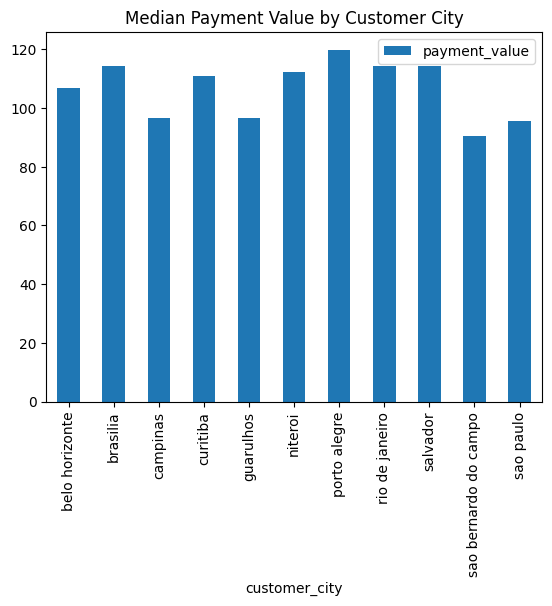

In [27]:
city_groups_median = Olist_data.groupby('customer_city')['payment_value'].median().reset_index()
city_groups_median.plot(kind='bar', x='customer_city', y='payment_value')
plt.title('Median Payment Value by Customer City')

Rio, Salvador, and Porto Alegre have the highest median in payment values.

Text(0.5, 1.0, 'Average Payment Value by Customer City')

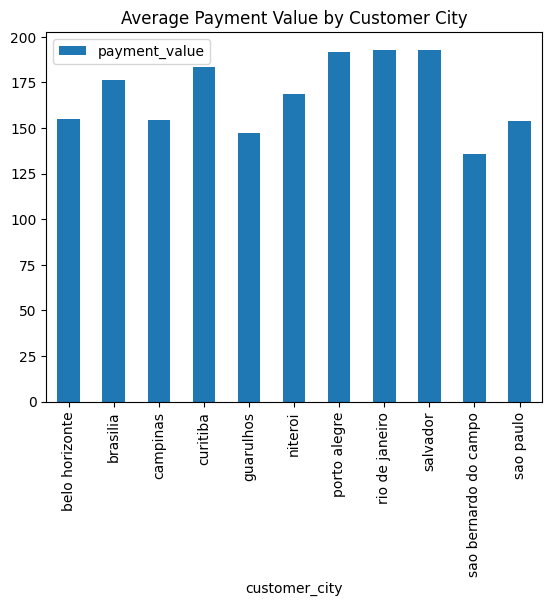

In [28]:
city_groups_mean = Olist_data.groupby('customer_city')['payment_value'].mean().reset_index()
city_groups_mean.plot(kind='bar', x='customer_city', y='payment_value')
plt.title('Average Payment Value by Customer City')

Rio, Salvador, and Porto Alegre have the highest average in payment values.

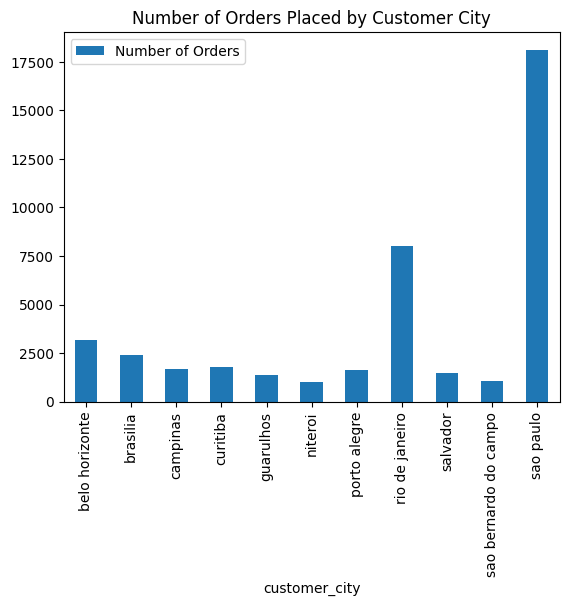

In [29]:
city_groups_orders = Olist_data.groupby('customer_city')['order_id'].count().reset_index()
city_groups_orders.plot(kind='bar', x='customer_city', y='order_id')
plt.title('Number of Orders Placed by Customer City')
plt.legend(['Number of Orders'])

Sau Paulo and Rio de Janeiro make up the vast majority of the orders place on Olist.

In [30]:
product_city_groups = Olist_data.groupby(['customer_city', 'product_category']).size().reset_index(name='count')
product_city_groups

,customer_city,product_category,count
0,belo horizonte,agro_industry_and_commerce,4
1,belo horizonte,air_conditioning,4
2,belo horizonte,art,6
3,belo horizonte,arts_and_craftmanship,1
4,belo horizonte,audio,11
...,...,...,...
634,sao paulo,stationery,383
635,sao paulo,tablets_printing_image,9
636,sao paulo,telephony,639
637,sao paulo,toys,678


In [31]:
most_popular_per_city = product_city_groups.loc[product_city_groups.groupby('customer_city')['count'].idxmax()]
most_popular_per_city

,customer_city,product_category,count
7,belo horizonte,bed_bath_table,368
98,brasilia,health_beauty,252
129,campinas,bed_bath_table,190
208,curitiba,furniture_decor,152
241,guarulhos,bed_bath_table,141
293,niteroi,bed_bath_table,120
343,porto alegre,bed_bath_table,183
402,rio de janeiro,bed_bath_table,905
495,salvador,health_beauty,147
542,sao bernardo do campo,furniture_decor,103


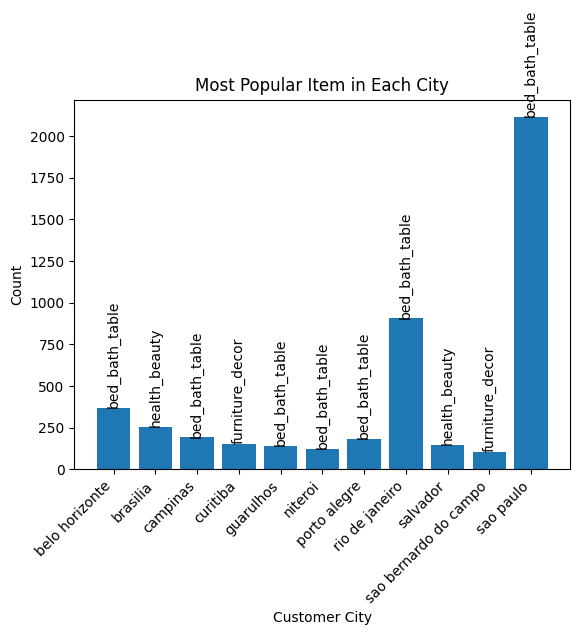

In [32]:
bars = plt.bar(most_popular_per_city['customer_city'], most_popular_per_city['count'])
plt.xlabel('Customer City')
plt.ylabel('Count')
plt.title('Most Popular Item in Each City')
plt.xticks(rotation=45, ha='right')
for bar, label in zip(bars, most_popular_per_city['product_category']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, label,ha='center', va='bottom', rotation=90)

Examining conditional probability of product category for customers in Sao Paulo.

In [33]:
sau_paulo_groups = Olist_data[Olist_data.customer_city == "sao paulo"].groupby("product_category")
sp_counts = sau_paulo_groups.size().reset_index(name = 'order_count')
sp_counts

,product_category,order_count
0,agro_industry_and_commerce,45
1,air_conditioning,37
2,art,36
3,arts_and_craftmanship,2
4,audio,67
...,...,...
65,stationery,383
66,tablets_printing_image,9
67,telephony,639
68,toys,678


Looking at total items ordered by category.

In [34]:
product_groups = Olist_data.groupby("product_category")
product_counts = product_groups.size().reset_index(name = 'order_count')
product_counts

,product_category,order_count
0,agro_industry_and_commerce,80
1,air_conditioning,113
2,art,78
3,arts_and_craftmanship,5
4,audio,157
...,...,...
66,stationery,930
67,tablets_printing_image,26
68,telephony,1487
69,toys,1631


Now time to calculate conditional probability for each product category, given that the customer is from Sao Paulo.

In [35]:
sp_counts['conditional_prob'] = (sp_counts.order_count / sp_counts.order_count.sum()) / \
                                (Olist_data[Olist_data.customer_city == "sao paulo"].shape[0] / Olist_data.shape[0])
sp_counts

,product_category,order_count,conditional_prob
0,agro_industry_and_commerce,45,0.005723
1,air_conditioning,37,0.004706
2,art,36,0.004579
3,arts_and_craftmanship,2,0.000254
4,audio,67,0.008521
...,...,...,...
65,stationery,383,0.048711
66,tablets_printing_image,9,0.001145
67,telephony,639,0.081270
68,toys,678,0.086231


In [36]:
conditional_prob_thresh = sp_counts.conditional_prob[sp_counts.conditional_prob > 0.1].index.to_list()
high_sp_counts = sp_counts[sp_counts.index.isin(conditional_prob_thresh)]
high_sp_counts

,product_category,order_count,conditional_prob
7,bed_bath_table,2113,0.268739
15,computers_accessories,1249,0.158853
39,furniture_decor,1351,0.171825
43,health_beauty,1796,0.228422
49,housewares,1391,0.176913
64,sports_leisure,1436,0.182636
69,watches_gifts,863,0.109760
